In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

import cv2
import glob
from sklearn.cluster import KMeans

import matplotlib.patches as patches

import numpy as np
import colorsys

In [2]:
fnames = glob.glob('figures/*.jpeg')

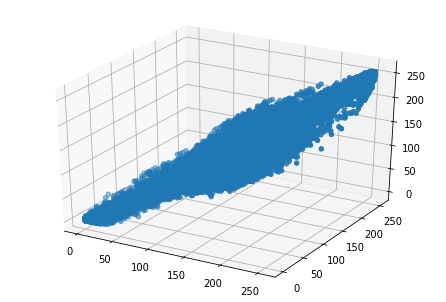

In [3]:
#read image
img = cv2.imread(fnames[0])

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [4]:
def plot_color_rects(img, dc):
    fig, ax = plt.subplots()

    ax.plot([1,4],[1,4])
    ax.imshow(img)
    ax.add_patch(patches.Rectangle(
        (1, 1),
        50,
        50,
        edgecolor = 'black',
        #facecolor = ()#'red',
        facecolor = (dc[0],dc[1], dc[2]),#'red',
        fill=True
     ) )
    title = str(dc).strip('[]')
    print(title)
    plt.title(str(title))
    #ax.title(str(dc))

In [21]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    
    def __init__(self, clusters=3):
        self.CLUSTERS = clusters
        #self.IMAGE = image
        #self.IMG = img
        
    def dominantColors(self, img):
    
        #read image
        #img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1] ),3)
        #print(img[1])
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int), self.LABELS



In [22]:
def set_mask(per, img):
# create a mask
    mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)
    print(img.shape[0], img.shape[1])
    print(mask.shape[0], mask.shape[1])
   
    hor_per = int(img.shape[0] *per /100)
    ver_per = int(img.shape[1] *per / 100)
    print([hor_per, ver_per])
    #mask[100:300, 100:400] = 255
    mask[hor_per : img.shape[0]-hor_per, ver_per: img.shape[1] -ver_per] = 255
    masked_img = cv2.bitwise_and(img, img,mask = mask)
    
    return masked_img 

def get_crop(per, img):
# create a mask
    #mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)
    #print(img.shape[0], img.shape[1])
    #print(mask.shape[0], mask.shape[1])
   
    hor_per = int(img.shape[0] *per /100)
    ver_per = int(img.shape[1] *per / 100)
    print([hor_per, ver_per])
    #mask[100:300, 100:400] = 255
    crop_img = img[hor_per : img.shape[0]-hor_per, ver_per: img.shape[1] -ver_per,:]
    #masked_img = cv2.bitwise_and(img, img,mask = mask)
    
    return crop_img #masked_img 

In [43]:
def get_topX_cluster_colors(img, cluster_cnt = 5, X=3):
    dc = DominantColors(cluster_cnt) 
    colors, labels = dc.dominantColors(img)
    counts = np.bincount(labels[labels>=0])
    top_labels = np.argsort(-counts)[:X]
    print(f'COLORS : {colors}')
    print(f'LABELS : {labels}')
    print(f'COUNTS : {counts}, TOTAL_COUNTS : {sum(counts)}')
    print(f'TOP LABELS : {top_labels}')
    print(f'TOP LABEL COUNTS : {counts[top_labels]}')
    top_colors = colors[top_labels]
    print(f'TOP COLORS : {top_colors}')
    total_pixel_cnt = img.shape[0]* img.shape[1]
    top_colors_percentage = counts[top_labels]/total_pixel_cnt
    print(f'Percentage TOP LABEL COUNTS : {top_colors_percentage}')
    
    top_colors_dict ={}
    for ccnt, c in enumerate(zip(top_colors,top_colors_percentage)):
        print(c[0])
        print(c[1])
        top_colors_dict[ccnt] = {'color' : c[0].tolist(), 'color_per' : float("{:.2f}".format(c[1]))}
    print(top_colors_dict)
    
    
    return colors, labels, counts, top_labels, top_colors_dict
  

In [46]:
    
fn= fnames[4]
bgrimg = cv2.imread(fn)
per = 20
#mg = set_mask(per, img)
bgrimg = get_crop(per, bgrimg)

rgbimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2RGB)
hsvimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2HSV)

cluster_cnt = 5
X = 4
print('RGB Image')
colors, labels, counts, top_labels, top_colors, top_colors_percentage = get_topX_cluster_colors(rgbimg, cluster_cnt, X)
print('HSV Image')
colors, labels, counts, top_labels, top_colors, top_colors_percentage = get_topX_cluster_colors(hsvimg, cluster_cnt, X)

[33, 60]
RGB Image
COLORS : [[ 50  48  50]
 [164 164 183]
 [104  85  95]
 [238 238 247]
 [112 117 140]]
LABELS : [2 2 2 ... 0 0 2]
COUNTS : [2888 1791 3937 2817 6927], TOTAL_COUNTS : 18360
TOP LABELS : [4 2 0 3]
TOP LABEL COUNTS : [6927 3937 2888 2817]
TOP COLORS : [[112 117 140]
 [104  85  95]
 [ 50  48  50]
 [238 238 247]]
Percentage TOP LABEL COUNTS : [0.37728758 0.21443355 0.15729847 0.15343137]
[112 117 140]
0.3772875816993464
[104  85  95]
0.21443355119825708
[50 48 50]
0.15729847494553376
[238 238 247]
0.15343137254901962
{0: {'color': [112, 117, 140], 'per': 0.38}, 1: {'color': [104, 85, 95], 'per': 0.21}, 2: {'color': [50, 48, 50], 'per': 0.16}, 3: {'color': [238, 238, 247], 'per': 0.15}}
HSV Image
COLORS : [[117  55 142]
 [110  18 242]
 [158 158 159]
 [ 18  73 100]
 [132  54  71]]
LABELS : [3 3 3 ... 3 3 3]
COUNTS : [8605 3422  916 2308 3109], TOTAL_COUNTS : 18360
TOP LABELS : [0 1 4 3]
TOP LABEL COUNTS : [8605 3422 3109 2308]
TOP COLORS : [[117  55 142]
 [110  18 242]
 [132 

[0.4392156862745098, 0.4588235294117647, 0.5490196078431373]
0.4392156862745098, 0.4588235294117647, 0.5490196078431373
[0.4117647058823529, 0.33725490196078434, 0.3764705882352941]
0.4117647058823529, 0.33725490196078434, 0.3764705882352941
[0.2, 0.19215686274509805, 0.2]
0.2, 0.19215686274509805, 0.2
[0.9333333333333333, 0.9333333333333333, 0.9686274509803922]
0.9333333333333333, 0.9333333333333333, 0.9686274509803922
[0.6392156862745098, 0.6392156862745098, 0.7137254901960784]
0.6392156862745098, 0.6392156862745098, 0.7137254901960784


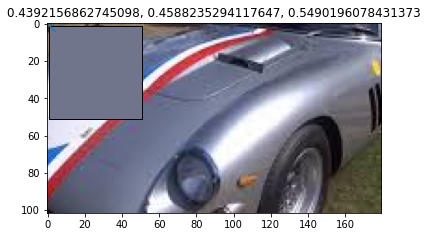

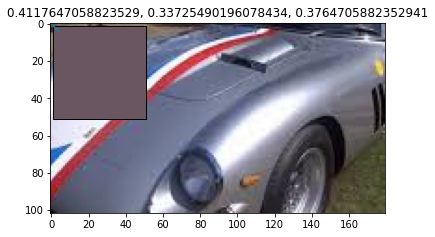

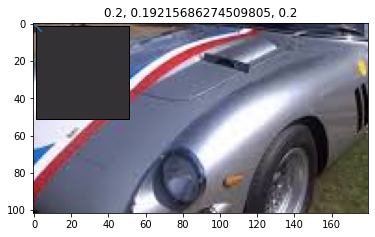

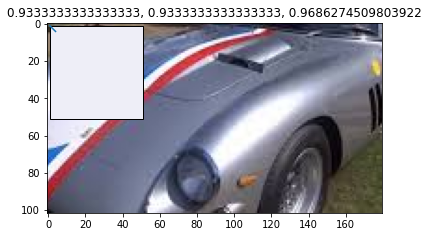

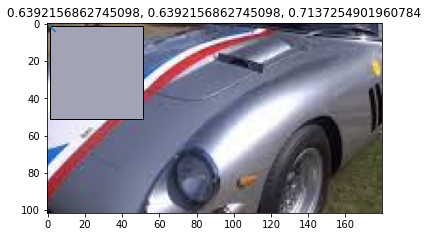

In [8]:
normrgbimg = rgbimg /255
#print(img)
for c in rgbcolors[rgbtop_labels]:
    #rc = colorsys.hsv_to_rgb(c[0],c[1],c[2])
    #print(rc)
    
    normc = [r/255 for r in c]
    print(normc)
    plot_color_rects(normrgbimg, normc)

[117  55 142]
[0.4588235294117647, 0.21568627450980393, 0.5568627450980392]
0.4588235294117647, 0.21568627450980393, 0.5568627450980392
[110  18 241]
[0.43137254901960786, 0.07058823529411765, 0.9450980392156862]
0.43137254901960786, 0.07058823529411765, 0.9450980392156862
[132  54  71]
[0.5176470588235295, 0.21176470588235294, 0.2784313725490196]
0.5176470588235295, 0.21176470588235294, 0.2784313725490196
[ 18  73 100]
[0.07058823529411765, 0.28627450980392155, 0.39215686274509803]
0.07058823529411765, 0.28627450980392155, 0.39215686274509803
[158 158 159]
[0.6196078431372549, 0.6196078431372549, 0.6235294117647059]
0.6196078431372549, 0.6196078431372549, 0.6235294117647059


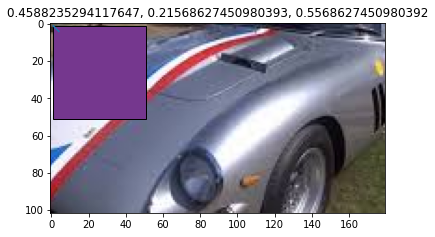

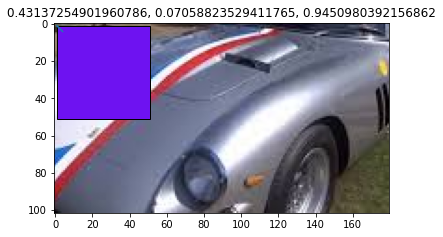

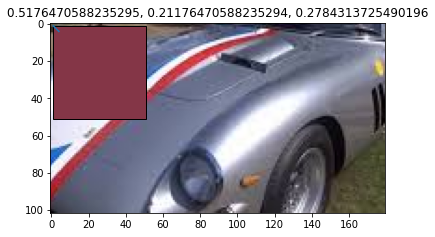

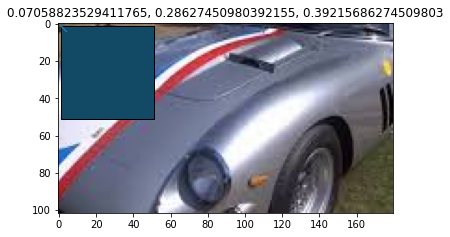

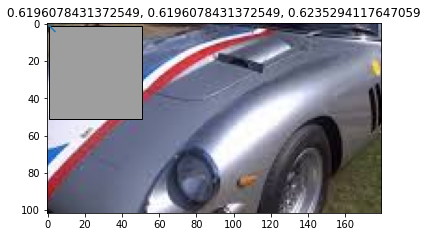

In [11]:
normrgbimg = rgbimg /255
#print(img)
for c in hsvcolors[hsvtop_labels]:
    print(c)
    #rc = colorsys.hsv_to_rgb(c[0],c[1],c[2])
    #print(rc)
    
    normc = [r/255 for r in c]
    print(normc)
    plot_color_rects(normrgbimg, normc)

[33, 60]
[[ 92  93  79]
 [ 95  97  83]
 [100 101  87]
 [103 104  90]
 [127 125 112]
 [121 119 104]
 [115 112  97]
 [107 104  87]
 [104 101  82]
 [107 102  80]
 [110 106  81]
 [113 107  83]
 [133 127 103]
 [123 115  92]
 [125 117  96]
 [134 123 103]
 [135 124 106]
 [142 129 112]
 [141 128 112]
 [131 115 100]
 [123 104  90]
 [ 79  59  48]
 [114  94  83]
 [142 122 111]
 [133 113 102]
 [113  93  84]
 [ 68  48  39]
 [ 48  28  21]
 [136 116 109]
 [138 118 111]
 [139 118 113]
 [138 117 112]
 [133 112 107]
 [131 110 107]
 [133 112 109]
 [137 117 110]
 [141 124 106]
 [139 123 100]
 [137 121  98]
 [135 119  96]
 [135 118  98]
 [137 120 100]
 [139 122 102]
 [141 124 104]
 [139 122 104]
 [144 127 109]
 [148 131 115]
 [146 129 113]
 [141 124 108]
 [139 122 106]
 [142 125 109]
 [147 130 114]
 [111  92  78]
 [106  88  74]
 [100  82  68]
 [ 93  75  61]
 [ 89  71  59]
 [ 86  69  59]
 [ 86  69  61]
 [ 87  70  62]
 [ 70  55  48]
 [ 64  49  42]
 [ 58  43  38]
 [ 59  46  40]
 [ 65  51  48]
 [ 67  53  50]
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


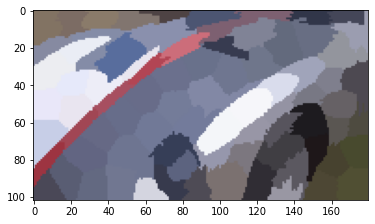

In [100]:

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax


#!pip install scikit-image
from skimage.segmentation import slic
import skimage.color as color
fn= fnames[4]

bgrimg = cv2.imread(fn)
rgbimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2RGB)
hsvimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2HSV)

#image_slic = slic(rgbimg,n_segments=155)

per = 20
rgbimg_cropped = get_crop(per, rgbimg)
print(rgbimg_cropped[0])
plt.imshow(rgbimg_cropped)

segments = slic(rgbimg_cropped, n_segments=100, compactness=20)
print(segments[0])
#color.label2rgb(segments, rgbimg, kind='avg')
img = color.label2rgb(segments, rgbimg_cropped, kind='avg')
plt.imshow(img)
